In [1]:
import glob

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import time
import visa

In [4]:
cd /Users/cosmology/Google Drive/Projects/radiometer

/Users/cosmology/Google Drive/Projects/radiometer


In [25]:
date = "2016-11-04"
t = "15"
files = glob.glob("Data/"+date+"_"+t+"*.txt")
print(files)

['Data/2016-11-04_15:01:33_Readout.txt', 'Data/2016-11-04_15:04:48_Readout.txt', 'Data/2016-11-04_15:10:25_Readout.txt', 'Data/2016-11-04_15:37:38_Readout.txt', 'Data/2016-11-04_15:42:04_Readout.txt']


-0.136921679245
-0.124107429112
-0.130288671197
-0.136665118036
-0.124048198113


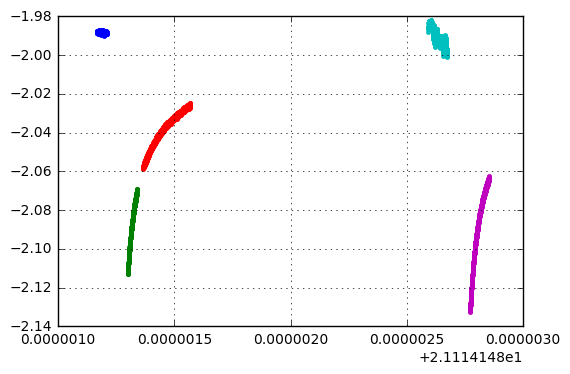

In [29]:
for f in files:
    data=np.loadtxt(f)
    plot(np.log(data[:,0]),np.log(-data[:,1]), '.')
    grid()
    print(np.mean(data[:,1]))


In [7]:
from scipy.optimize import curve_fit

In [8]:
def log(t,a,t_0):
    return t_0+np.log(t/a)


In [9]:
print data[:,0]

[  1.47828814e+09   1.47828814e+09   1.47828814e+09 ...,   1.47828826e+09
   1.47828826e+09   1.47828826e+09]


In [10]:
def expo(t,a,t_0):
    t = t-t[0]+1
    return t_0*(1.0-np.exp(-t/a))


In [11]:
z = curve_fit(expo,data[:,0],-data[:,1])

/Users/cosmology/anaconda2/envs/radiometer/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/Users/cosmology/anaconda2/envs/radiometer/lib/python2.7/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [122]:
print(z)


(array([ 0.41089202,  0.12409226]), array([[  3.52216280e-04,   1.19182634e-07],
       [  1.19182634e-07,   4.70864515e-09]]))


In [123]:
y = expo(data[:,0],*z[0])

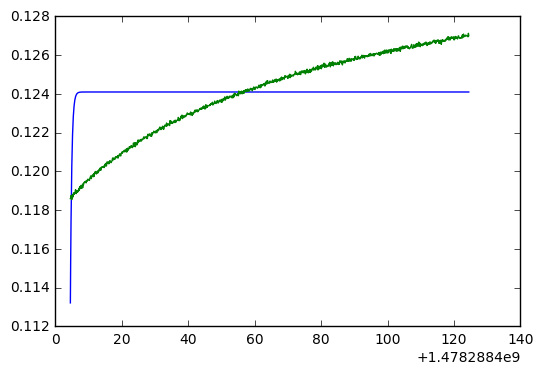

In [124]:
plot(data[:,0],y)
plot(data[:,0],-data[:,1])